In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

CURR_DIR = os.getcwd()

'/home/kimele03/uvvisml/uvvisml/models_same_test_set/'

In [12]:
def make_plot(preds_file, true_file, col_name, title, units, img_name):
    preds_df = pd.read_csv(preds_file)
    true_df = pd.read_csv(true_file)

    true_value = true_df[col_name]
    pred_value = preds_df[col_name]

    plt.figure(figsize=(5,5))
    plt.scatter(true_value, pred_value)
    plt.title(title, fontsize=15)
    if units != '':
        plt.xlabel('true values (' + units + ')', fontsize=12)
        plt.ylabel('predictions (' + units + ')', fontsize=12)
    else:
        plt.xlabel('true values', fontsize=12)
        plt.ylabel('predictions', fontsize=12)
    plt.axis('equal')
    metrics = calculate_metrics(true_value, pred_value)
#     plt.text(0, 1.25, metrics, verticalalignment='top')
#     plt.text(0, -0.1, metrics, ha = 'left', verticalalignment='top')
    plt.figtext(0.1, 0.0, metrics)
    file_path = 'prediction_plots_images_same_test_set/' + img_name
    plt.savefig(file_path)
#     plt.show()

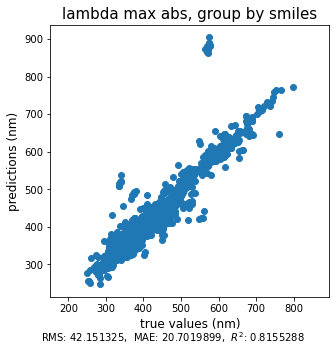

In [8]:
#testing

preds_file = 'uvvisml/models_same_test_set/lambda_max_abs_checkpoints/group_by_smiles/lambda_max_abs_preds.csv'
true_file = 'uvvisml/data/splits_same_test_set/lambda_max_abs/deep4chem/group_by_smiles/smiles_target_test.csv'
col_name = 'abs_peakwavs_max'
title = 'lambda max abs, group by smiles'
units = 'nm'
img_name = 'abs_peakwavs_max__group_by_smiles__alone.png'

make_plot(preds_file, true_file, col_name, title, units, img_name)

In [6]:
def calculate_metrics(true_value, predicted_value):
    rms = round(mean_squared_error(true_value, predicted_value, squared=False), 7)
    mae = round(mean_absolute_error(true_value, predicted_value), 7)
    r2 = round(r2_score(true_value, predicted_value), 7)
    
    result = 'RMS: ' + str(rms) + ',  MAE: ' + str(mae) + ',  $R^2$: ' + str(r2)
    return result

In [20]:
opt_properties = ['lambda_max_abs', 'lambda_max_emi', 'both_peaks']
split_types = ['group_by_smiles', 'random', 'scaffold']

prop_to_col_name = {'lambda_max_abs': 'abs_peakwavs_max',
                   'lambda_max_emi': 'emi_peakwavs_max',
                   'both_peaks': ['abs_peakwavs_max', 'emi_peakwavs_max'],
                    'abs_all': ['abs_peakwavs_max', 'abs_bandwidth', 'abs_molar_ext_coeff'],
                    'emi_all': ['emi_peakwavs_max', 'emi_bandwidth'],
                    'multitask_peak_stats': ['abs_peakwavs_max', 'abs_bandwidth', 'abs_molar_ext_coeff', 'emi_peakwavs_max', 'emi_bandwidth'],
                   'multitask_all': ['abs_peakwavs_max', 'abs_bandwidth', 'abs_molar_ext_coeff', 'emi_peakwavs_max', 'emi_bandwidth', 'quantum_yield', 'log_lifetime'],
                    'quantum_yield': 'quantum_yield',
                    'log_lifetime': 'log_lifetime'}

col_units = {'peakwavs_max': 'nm',
           'emi_peakwavs_max': 'nm',
           'abs_peakwavs_max': 'nm',
            'abs_bandwidth': 'nm',
             'abs_molar_ext_coeff': '$mol^{-1}$ $dm^3$ $cm^{-1}$',
            'emi_bandwidth': 'nm',
            'quantum_yield': '',
            'log_lifetime': 'ns'}

my_order = {'lambda_max_abs':'1', 'lambda_max_emi':'1', 'both_peaks':'2', 'abs_all':'3', 'emi_all':'3', 'multitask_peak_stats':'4', 'multitask_all':'5', 'quantum_yield':'1', 'log_lifetime':'1'}

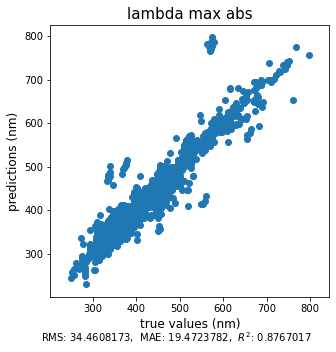

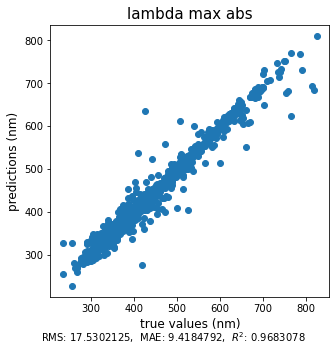

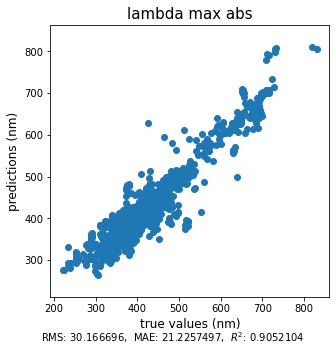

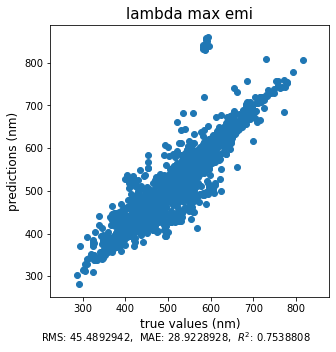

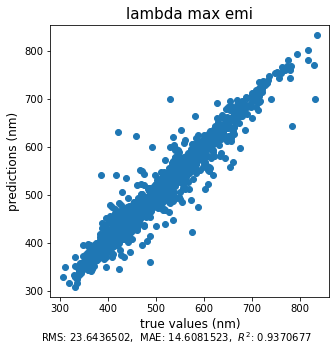

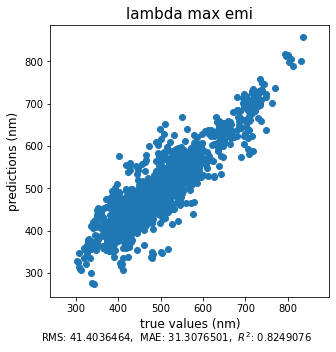

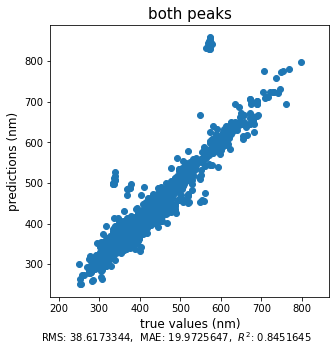

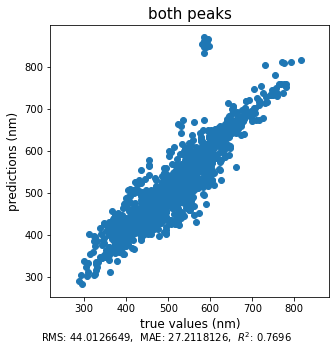

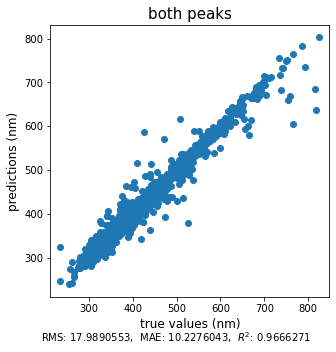

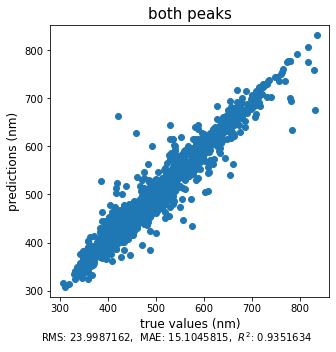

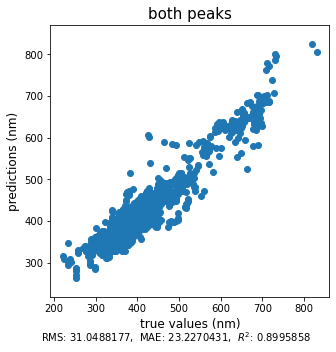

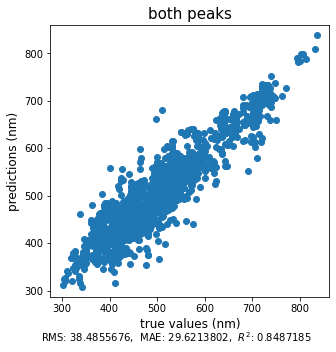

In [21]:
for opt_prop in opt_properties:
    for split_type in split_types:
        preds_file = os.path.join(CURR_DIR, 'uvvisml/models_same_test_set/'+ opt_prop + '_checkpoints/' + split_type + '/' + opt_prop + '_preds.csv')
        true_file = os.path.join(CURR_DIR, 'uvvisml/data/splits_same_test_set/'+ opt_prop + '/deep4chem/' + split_type + '/smiles_target_test.csv')
        col_names = prop_to_col_name[opt_prop]
        if isinstance(col_names, list):
            for n in col_names:
                col_name = n
                #title = opt_prop.replace('_', ' ') + ', ' + split_type.replace('_', ' ') + ', ' + col_name.replace('_', ' ')
                title = opt_prop.replace('_', ' ')
                units = col_units[col_name]
                img_name = col_name + '__' + split_type + '__' + my_order[opt_prop] + opt_prop + '.png'
                make_plot(preds_file, true_file, col_name, title, units, img_name)
        else:
            col_name = col_names
            #title = opt_prop.replace('_', ' ') + ', ' + split_type.replace('_', ' ')
            title = opt_prop.replace('_', ' ')
            units = col_units[col_name]
            if col_name == 'peakwavs_max':
                img_name_col_name = 'abs_peakwavs_max'
            else:
                img_name_col_name = col_name
            img_name = img_name_col_name + '__' + split_type + '__' + my_order[opt_prop] + 'alone.png'
            make_plot(preds_file, true_file, col_name, title, units, img_name)